In [1]:
import pandas as pd
import glob
import os

def concatenate_tab_delimited_files(folder_path, output_filename="combined_table.txt"):
    """
    Concatenates multiple tab-delimited text files with the same columns
    into a single tab-delimited file using pandas.

    Args:
        folder_path (str): The path to the folder containing the text files.
        output_filename (str, optional): The name of the output file.
                                         Defaults to "combined_table.txt".
    """
    all_data = []
    all_files = glob.glob(os.path.join(folder_path, "*.txt"))  # Adjust "*.txt" if needed

    if not all_files:
        print(f"No '.txt' files found in the folder: {folder_path}")
        return

    for filename in all_files:
        try:
            df = pd.read_csv(filename, sep='\t')

            df['file'] = [filename.split('/')[-1]]*len(df)
            df['plate'] = [filename.split('/')[-1].split('_')[0]]*len(df)
            df['cell_line'] = [filename.split('/')[-1].split('_')[1]+'_'+filename.split('/')[-1].split('_')[2]]*len(df)

            #display(df)
            #break

            all_data.append(df)
            print(f"Successfully read: {filename}")
        except FileNotFoundError:
            print(f"Error: File not found - {filename}")
        except pd.errors.EmptyDataError:
            print(f"Warning: Empty file - {filename}")
        except Exception as e:
            print(f"Error reading {filename}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)

        try:
            combined_df.to_csv(output_filename, sep='\t', index=False)
            print(f"\nCombined data saved to: {output_filename}")
        except Exception as e:
            print(f"Error saving combined data to {output_filename}: {e}")
    else:
        print("No data was successfully read from the files.")

In [24]:
if __name__ == "__main__":
    folder_path = '/home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/'#input("Enter the path to the folder containing the text files: ")
    output_filename = 'number_of_cells.tsv'#input("Enter the desired name for the output file (e.g., combined.txt): ")
    concatenate_tab_delimited_files(folder_path, output_filename)
    print("\nScript finished.") 

Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0023_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0028_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0069_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0099_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0131_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0152_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0179_numberofcells.txt
Successfully read: /home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/plate10_CVCL_0218_numberofce

In [2]:
import pandas as pd
import glob
import os

folder_path = '/home/zinovyev/gits/arc-virtual-cell-atlas/tahoe-100/data/cell_numbers/'
all_files = glob.glob(os.path.join(folder_path, "*.txt"))
print(all_files)


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


[]


In [3]:
print(sc.__version__)

NameError: name 'sc' is not defined

In [4]:
import scanpy as sc
f = 'data/CVCL_0179_Adenine_ICA.h5ad'
adata = sc.read_h5ad(f)

In [7]:
adata.uns['gene_names']

array(['NEAT1', 'NCOA3', 'RPL23', ..., 'NAGK', 'CDKL4', 'ASB6'],
      shape=(10000,), dtype=object)

In [26]:
print(adata.uns['Metagenes'])

[[ 1.68158641e+00  3.66970109e+00 -2.19782465e+00 ...  1.31000574e+01
   3.42668983e-01  3.10726621e+00]
 [-2.13708885e+00 -2.87087899e+00  1.03484431e+00 ... -1.96499445e-02
   6.58186836e+00 -3.83277335e+00]
 [-2.05460839e-02 -6.93387682e-01 -8.68132261e-01 ... -1.96100098e+00
   2.79245039e+00  1.03500141e+00]
 ...
 [-4.03580942e-01  6.00014028e-01  1.89071877e-01 ... -3.11536397e-01
   5.45436342e-02  2.74769009e-01]
 [ 1.45587121e-01  8.50696430e-02  7.36357684e-02 ...  4.42164940e-01
  -4.36154366e-01 -4.85958699e-01]
 [-3.65622212e-02 -7.61722980e-02 -5.97858118e-03 ... -2.82907580e-01
  -1.32175590e-02  1.55523807e-01]]


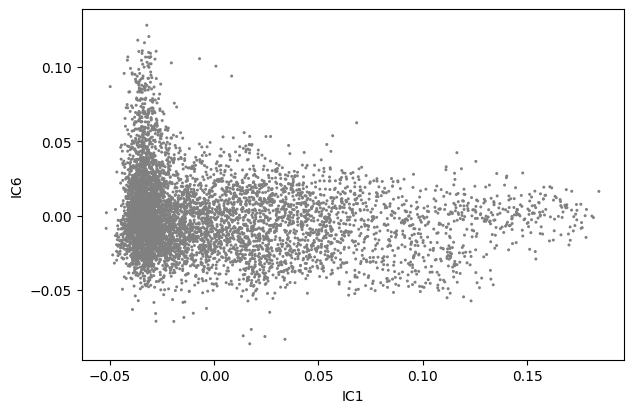

In [15]:
sc.pl.scatter(adata,x='IC1',y='IC6')

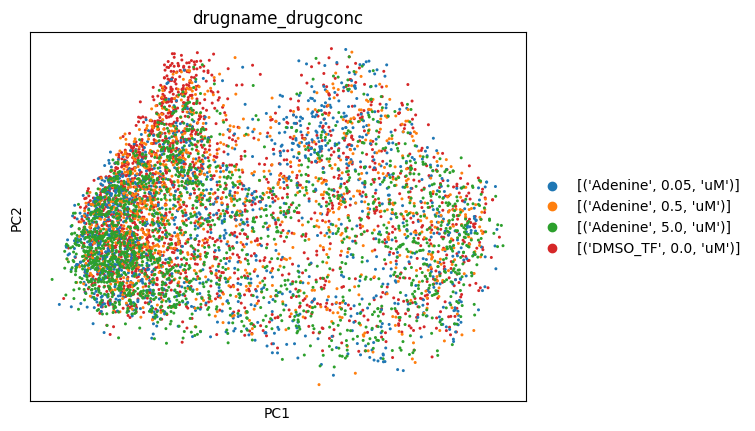

In [17]:
sc.tl.pca(adata)
sc.pl.pca(adata,color='drugname_drugconc')

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


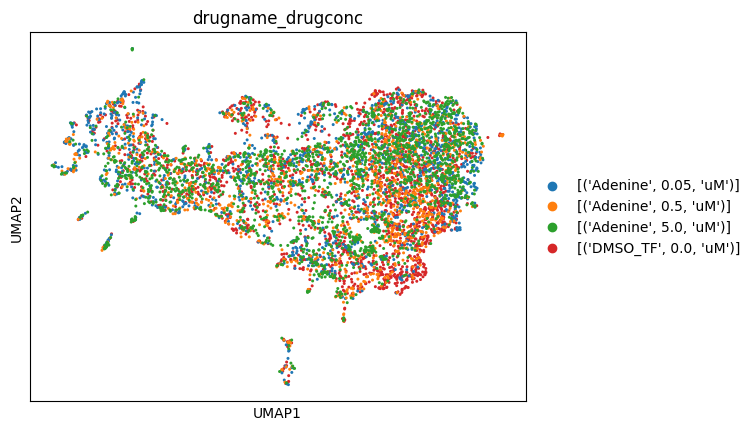

In [18]:
sc.pp.neighbors(adata,n_neighbors=10)
sc.tl.umap(adata)
sc.pl.umap(adata,color='drugname_drugconc')

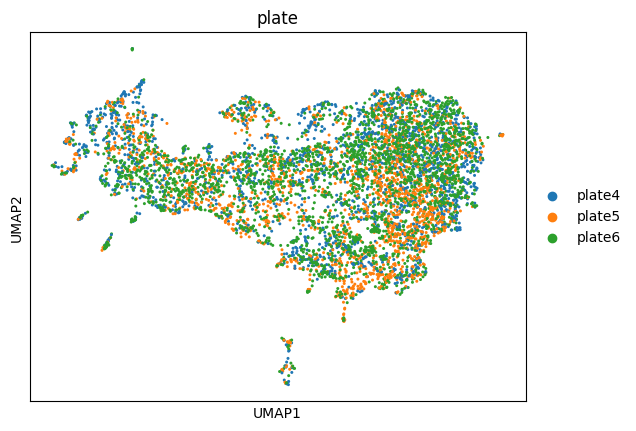

In [19]:
sc.pl.umap(adata,color='plate')

In [11]:
!gsutil -m cp "gs://tahoe100m_bycelllines/cellline_drug_analysis/CVCL_0179_Adenosine_signature.pkl" data/

Copying gs://tahoe100m_bycelllines/cellline_drug_analysis/CVCL_0179_Adenosine_signature.pkl...
- [1/1 files][946.4 KiB/946.4 KiB] 100% Done                                    
Operation completed over 1 objects/946.4 KiB.                                    


In [1]:
import pickle
import numpy as np
with open('data/CVCL_0179_Adenosine_signature.pkl', 'rb') as file:
    signature = pickle.load(file)

In [11]:
signature['plate4']

{'params': {'groupby': 'drugname_drugconc',
  'reference': "[('DMSO_TF', 0.0, 'uM')]",
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('VEGFA',), ('ERBB2',), ('NEAT1',), ..., ('S100A6',),
            ('NAALADL2',), ('RPL35A',)],
           dtype=[("[('Adenosine', 0.05, 'uM')]", 'O')]),
 'scores': rec.array([( 9.019642 ,), ( 7.950824 ,), ( 7.3855147,), ...,
            (-4.7945633,), (-5.2508025,), (-5.6230264,)],
           dtype=[("[('Adenosine', 0.05, 'uM')]", '<f4')]),
 'pvals': rec.array([(1.88705946e-19,), (1.85275286e-15,), (1.51864791e-13,), ...,
            (1.63029707e-06,), (1.51438026e-07,), (1.87640883e-08,)],
           dtype=[("[('Adenosine', 0.05, 'uM')]", '<f8')]),
 'pvals_adj': rec.array([(1.88705946e-15,), (9.26376431e-12,), (5.06215969e-10,), ...,
            (6.27517767e-04,), (8.41322367e-05,), (1.70582621e-05,)],
           dtype=[("[('Adenosine', 0.05, 'uM')]", '<f8')]),
 'logfoldchanges':

In [9]:
print(signature['plate11']['names'][:10])
print(signature['plate10']['names'][:10])

[('TALAM1',) ('RPL4',) ('NPM1',) ('RPL35',) ('RPS3',) ('RPS27L',)
 ('RPL17',) ('UQCRB',) ('RPS8',) ('RPL21',)]
[('TALAM1',) ('RPL4',) ('RPS16',) ('RPLP1',) ('RPL12',) ('RPL26',)
 ('RPS3',) ('RPS12',) ('RPS8',) ('NAP1L1',)]


In [12]:
print(np.__version__)

2.2.5


In [14]:
signature['plate5']

{'params': {'groupby': 'drugname_drugconc',
  'reference': "[('DMSO_TF', 0.0, 'uM')]",
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('VEGFA',), ('NEAT1',), ('ERBB2',), ..., ('VDAC1',),
            ('THUMPD3-AS1',), ('RPL35A',)],
           dtype=[("[('Adenosine', 0.5, 'uM')]", 'O')]),
 'scores': rec.array([( 13.387479 ,), ( 10.637927 ,), ( 10.544583 ,), ...,
            ( -7.8228507,), ( -8.145071 ,), (-10.247414 ,)],
           dtype=[("[('Adenosine', 0.5, 'uM')]", '<f4')]),
 'pvals': rec.array([(7.15691993e-41,), (1.98495658e-26,), (5.38106637e-26,), ...,
            (5.16403274e-15,), (3.79059434e-16,), (1.21553015e-24,)],
           dtype=[("[('Adenosine', 0.5, 'uM')]", '<f8')]),
 'pvals_adj': rec.array([(7.15691993e-37,), (9.92478288e-23,), (1.79368879e-22,), ...,
            (4.69457522e-12,), (3.79059434e-13,), (3.03882537e-21,)],
           dtype=[("[('Adenosine', 0.5, 'uM')]", '<f8')]),
 'logfoldchang